## Pregunta 6
Una empresa de telecomunicaciones acaba de incursionar en una nueva ciudad y está dimensionando y planificando el despliegue de un sistema para interconectar sus servidores prime. 

La interconexión debe unir los servidores prime que se encuentran en los centros de datos de sus cinco sedes (norte, sur, centro, este y oeste), así como también interconectar a sus tres centros de atención al cliente. 

El área de Planificación y Optimización debe seleccionar un conjunto de líneas de fibra óptica que conecte todos los servidores prime de sus 5 sedes y de sus 3 centros de atención al cliente, a un mínimo costo posible por línea.

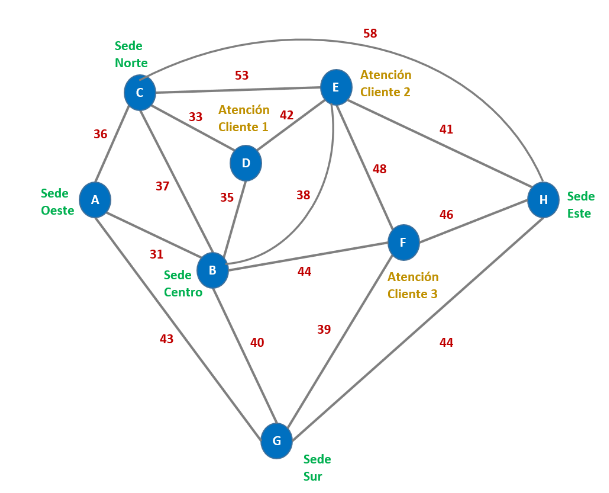

### Se solicita

- (1pto)   Hallar de forma manual, si existe, el conjunto de líneas de fibra óptica.

- (1ptos) Hallar de forma manual el costo total del conjunto de líneas elegido, adjuntando el procedimiento seguido de forma manual en un archivo tipo .jpg

- (4ptos) Indicar el algoritmo o técnica utilizado para resolver el requerimiento, implementando y adjuntando el código en Python que considere:
Ingresar y mostrar el grafo del enunciado.

- Señalar cada una de las lineas de fibra óptica encontradas así como sus costos por cada linea (camino) de fibra óptica.

- Mostrar el grafo resultante con las lineas de fibra óptica encontradas así como sus costos por cada linea (camino) de fibra óptica.

### Aproach:
Dado que nos piden que los servidores y datos esten conectados utilizando la minima cantidad de fibra optica posible. Podemos hacer un simil entre `nodos` -> servidores y datos, `aristas` -> distancia entre servidores y datos.


Entonces la minima forma de obtener todos conectados es obteniendo el arbol de expansion (`MST`) minima en el grafo descrito anteriormente.

Finalmente, para mi caso en particular empleare el algoritmo de Kruskal.

In [71]:
#@title Clase DisjoinSet para usar union-find y clase grafo
from collections import defaultdict
class DisjointSet:
    def __init__(self, n):
        self.rank = [0] * n
        self.parent = [i for i in range(n)]
    
    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        
        return self.parent[x]
    
    def union(self, x, y):
        xroot = self.find(x)
        yroot = self.find(y)
        
        if xroot == yroot:
            return
        
        if self.rank[xroot] < self.rank[yroot]:
            self.parent[xroot] = yroot
        
        elif self.rank[xroot] > self.rank[yroot]:
            self.parent[yroot] = xroot
        
        else:
            self.parent[yroot] = xroot
            self.rank[xroot] += 1
class Graph():
    def __init__(self, V):
        self.V = V
        self.graph = defaultdict(list)
    
    def fromList(self, L):
        V = len(L)
        for u, e in enumerate(L):
              for v, w in e:
                 self.addEdge(u, v, w)
    def getList(self):
      result = []
      for key, values in sorted(self.graph.items()):
        temp_set = set()
        for pair in values:
            temp_set.add((pair[0], pair[1]))
        temp_list = list(temp_set)
        result.append(temp_list)
      return result

    def addEdge(self, src, dest, weight):
        newNode = [dest, weight]
        self.graph[src].insert(0, newNode)
        newNode = [src, weight]
        self.graph[dest].insert(0, newNode)
    
    def KruskalMST(self):
        n = self.V
        ds = DisjointSet(n)
        edges = [(w, u, v) for u in range(n) for v, w in self.graph[u]]
        edges.sort()
        mst = []
        result = []
        links = 0

        for w, u, v in edges:
            if ds.find(u) != ds.find(v):
                ds.union(u, v)
                result.append((u, v, w))
                mst.append((u, v))
                links += 1
            if links == n - 1:
                break
        tot_weight = 0
        for u, v, weight in result:
            tot_weight += weight
            print("%c -> %c: %d" % (chr(u+65), chr(v+65), weight))
            #print("%d -> %d: %d" % (u, v, weight))

        print("El costo del conjunto de líneas de fibra óptica es: ", tot_weight)

        return mst

In [72]:
#@title Dibujado
import graphviz as gv
def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             simplepath=True,
             layout="sfdp", defaultcolor="gray"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = defaultcolor
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  path = enumerate(path) if simplepath else path
  for v, u in path:
    if u != -1:
      if weighted:
        for vi, w in L[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [73]:
#@title Creacion de aristas segun el grafico
# donde A -> 0, B -> 1, etc
edges = [(0, 1, 31), (0, 2, 36), (0, 6, 43), (1, 2, 37), (1, 3, 35), (1, 4, 38), (1, 7, 44), (1, 6, 40), (2, 3, 33), (2, 4, 53), (2, 7, 58), (3, 4, 42), (4, 5, 48), (4, 7, 41), (5, 6, 39), (5, 7, 46), (6, 7, 44)]

In [74]:
#@title Creacion del grafo y adicion de aristas
g = Graph(8)
for e in edges:
  u, v, w = e
  g.addEdge(u, v, w)

In [75]:
#@title Ordenamiento de aristas (ayuda para la parte manual)
srte = []
for e in edges:
  u, v, w = e
  srte.append((w, u, v))

srte.sort()
for e in srte:
  w, u, v = e
  print("%c -> %c: %d" % (chr(u+65), chr(v+65), w))


A -> B: 31
C -> D: 33
B -> D: 35
A -> C: 36
B -> C: 37
B -> E: 38
F -> G: 39
B -> G: 40
E -> H: 41
D -> E: 42
A -> G: 43
B -> H: 44
G -> H: 44
F -> H: 46
E -> F: 48
C -> E: 53
C -> H: 58


A -> B: 31
C -> D: 33
B -> D: 35
B -> E: 38
F -> G: 39
B -> G: 40
E -> H: 41
El costo del conjunto de líneas de fibra óptica es:  257

El grafo en su totalidad son las lineas grises
Las lineas naranjas conforman el MST


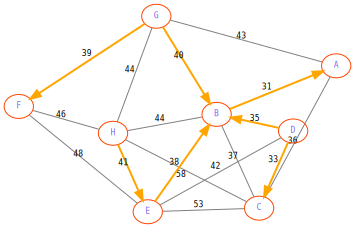

In [76]:
#@title Lineas de fibra optica + grafo resultante
prntK = g.KruskalMST()
print("\nEl grafo en su totalidad son las lineas grises")
print("Las lineas naranjas conforman el MST")
adjlShow(g.getList(), "ABCDEFGH",weighted=True, path=prntK, simplepath=False)